In [1]:
!pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

In [2]:
df = pd.read_csv('Eto-Rinconada.csv',index_col='Data')
df.index = pd.to_datetime(df.index,format='%d-%m-%Y')
df = df.interpolate()
df = df[['Eto']]
df = df[:'2022-06-01']

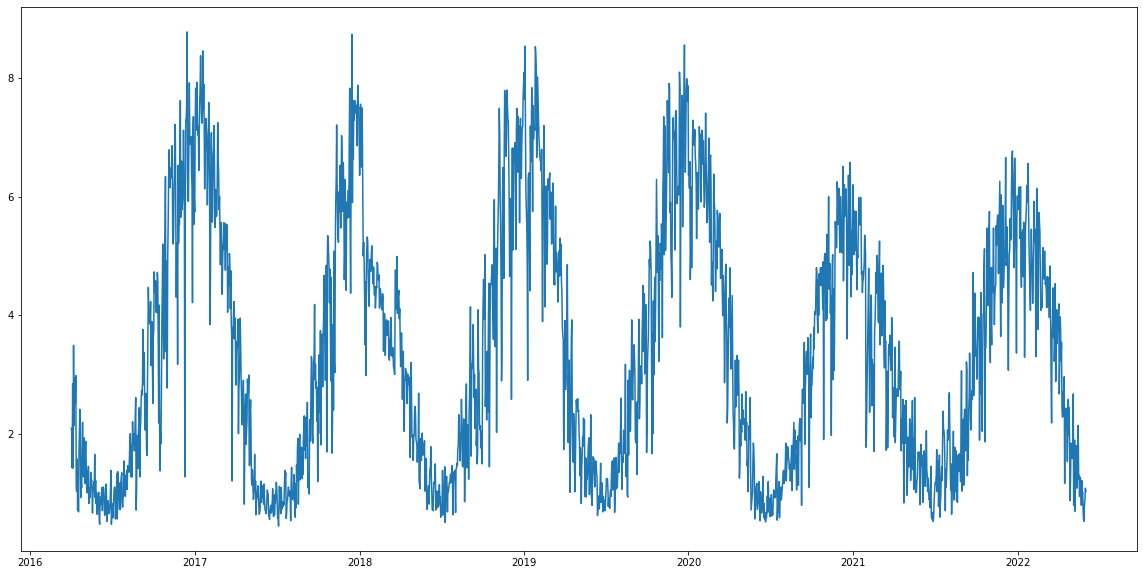

In [3]:
fig = plt.figure(figsize=(20,10))
plt.plot(df);

In [4]:
train = df.iloc[:-105]
test = df.iloc[-105:]
import warnings
warnings.filterwarnings('ignore')

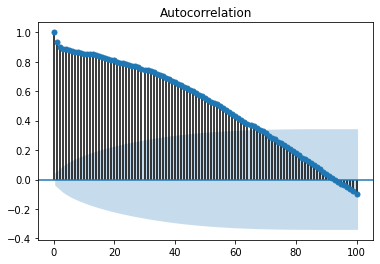

In [8]:
plot_acf(df['Eto'],lags=100);

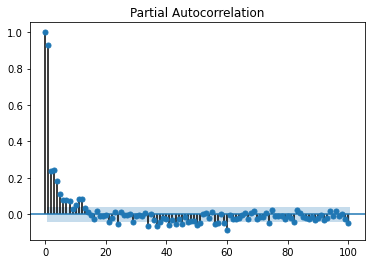

In [9]:
plot_pacf(df['Eto'],lags=100);

In [8]:
# auto_arima(train,m=365).summary()

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Y_PRED = []
for i in range(105): 
    model = SARIMAX(df.iloc[:-105+i], order = (1, 0, 4), seasonal_order=(0,1,0,365))
    results = model.fit()
    y_pred = results.predict(start = len(df.iloc[:-105+i]),end = (len(df.iloc[:-105+i])+7))
    df_ = pd.DataFrame(data=y_pred)
    df_.to_csv('Pred/y_pred'+str(i+1)+'.csv')
    Y_PRED.append(y_pred)


  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =

In [14]:
start = len(train)
end = len(train) + len(test)-1

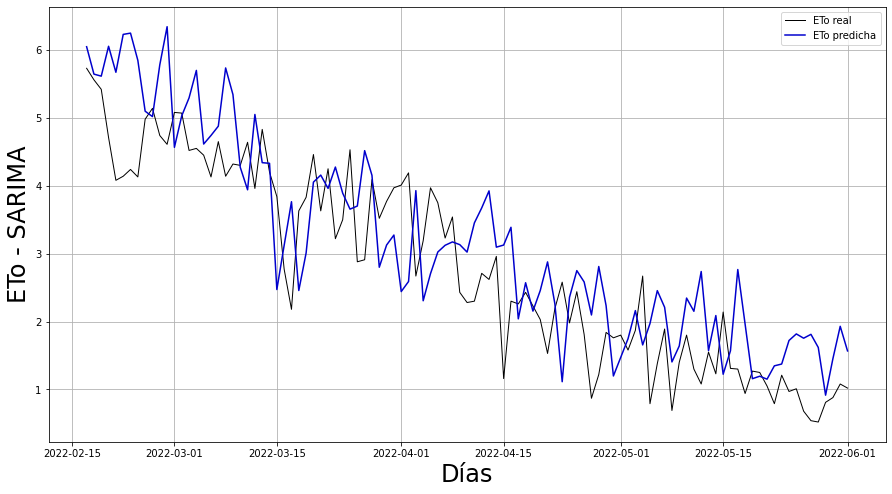

In [15]:
predictions = results.predict(start=start,end=end)
fig = plt.subplots(figsize=[15,8])
plt.grid()
plt.plot(test,'-', color = 'black', ms=4, lw=1, alpha=1, label='ETo real')
plt.plot(predictions,'-', color = 'mediumblue', ms=4, alpha=1, label='ETo predicha',linewidth=1.5)
plt.legend();
plt.xlabel("Días", fontsize=24)
plt.ylabel("ETo - SARIMA", fontsize=24);

In [31]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_one_day = []
y_seven_days = []
y_true_one = test.iloc[-105:]
for i in range(len(Y_PRED)):
    y_one_day.append(Y_PRED[i][0])
    y_seven_days.append(Y_PRED[i][6])

df_ = pd.read_csv('Eto-Rinconada.csv',index_col='Data')
df_.index = pd.to_datetime(df_.index,format='%d-%m-%Y')
df_ = df_.interpolate()
df_ = df_[['Eto']]
df_ = df_[:'2022-06-07']    
y_true_seven = df_.iloc[-105:]

In [32]:
y_true_one

,Eto
Data,
2022-02-17,5.73
2022-02-18,5.56
2022-02-19,5.42
2022-02-20,4.71
2022-02-21,4.08
...,...
2022-05-28,0.52
2022-05-29,0.81
2022-05-30,0.88


In [33]:
y_true_seven

,Eto
Data,
2022-02-23,4.24
2022-02-24,4.13
2022-02-25,4.98
2022-02-26,5.14
2022-02-27,4.74
...,...
2022-06-03,0.48
2022-06-04,0.65
2022-06-05,1.09


In [34]:
print("R2:",r2_score(np.array(y_one_day),np.array(y_true_one)))
print("RMSE:",mean_squared_error(np.array(y_one_day),np.array(y_true_one),squared=False))
print("MAE:",mean_absolute_error(np.array(y_one_day),np.array(y_true_one)))
print("NRMSE:",(mean_squared_error(np.array(y_one_day),np.array(y_true_one),squared=False))/np.mean(y_true_one))

R2: 0.6803734112088993
RMSE: 0.8456246591070044
MAE: 0.6895247686094792
NRMSE: Eto    0.300394
dtype: float64


In [35]:
print("R2:",r2_score(np.array(y_seven_days),np.array(y_true_seven)))
print("RMSE:",mean_squared_error(np.array(y_seven_days),np.array(y_true_seven),squared=False))
print("MAE:",mean_absolute_error(np.array(y_seven_days),np.array(y_true_seven)))
print("NRMSE:",(mean_squared_error(np.array(y_seven_days),np.array(y_true_seven),squared=False))/np.mean(y_true_seven))

R2: 0.6049030380031117
RMSE: 0.8736861350657876
MAE: 0.6957150808545579
NRMSE: Eto    0.339013
dtype: float64


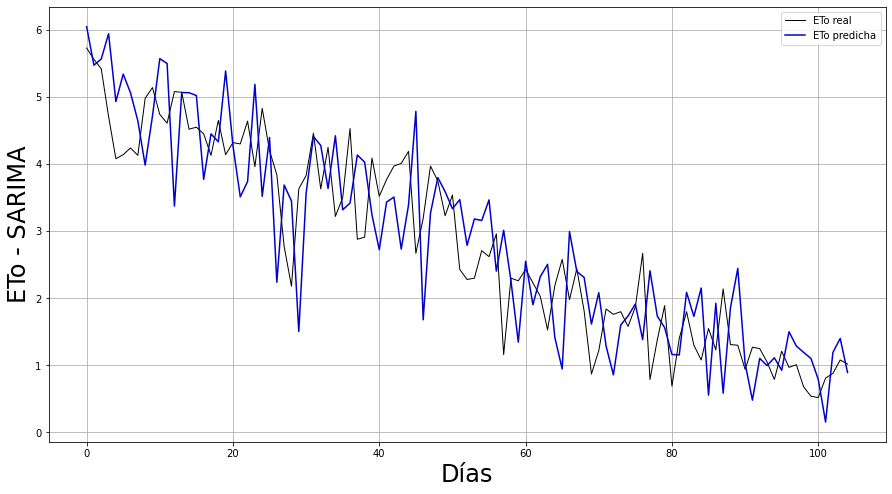

In [39]:
fig = plt.subplots(figsize=[15,8])
plt.grid()
plt.plot(np.array(y_true_one),'-', color = 'black', ms=4, lw=1, alpha=1, label='ETo real')
plt.plot(np.array(y_one_day),'-', color = 'mediumblue', ms=4, alpha=1, label='ETo predicha',linewidth=1.5)
plt.legend();
plt.xlabel("Días", fontsize=24)
plt.ylabel("ETo - SARIMA", fontsize=24);

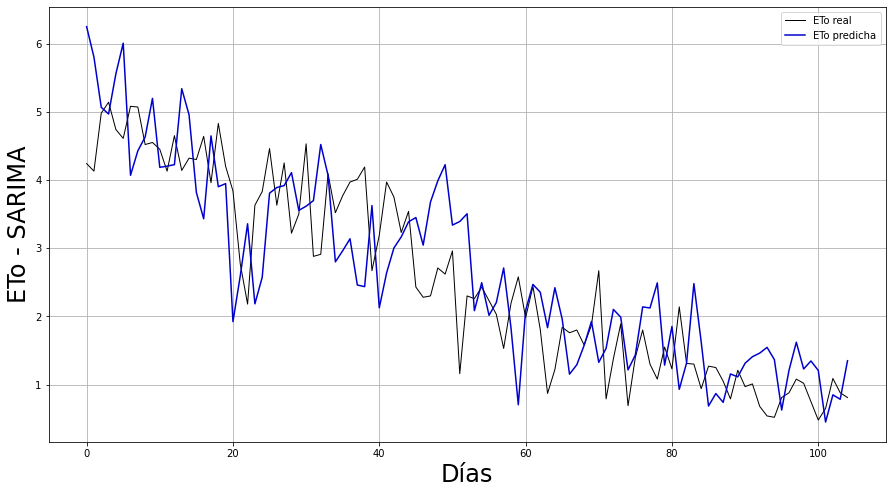

In [40]:
fig = plt.subplots(figsize=[15,8])
plt.grid()
plt.plot(np.array(y_true_seven),'-', color = 'black', ms=4, lw=1, alpha=1, label='ETo real')
plt.plot(np.array(y_seven_days),'-', color = 'mediumblue', ms=4, alpha=1, label='ETo predicha',linewidth=1.5)
plt.legend();
plt.xlabel("Días", fontsize=24)
plt.ylabel("ETo - SARIMA", fontsize=24);

In [11]:

y_true = test.iloc[-105:]
y_hat = predictions.iloc[-105:]
r2 = r2_score(test,predictions)
rmse = mean_squared_error(test,predictions,squared=False)
mae = mean_absolute_error(test,predictions)

print("R2: ",r2, "RMSE: ",rmse,"MAE: ",mae)

R2:  0.5816888140929279 RMSE:  0.9319528037533623 MAE:  0.7628782266481985


In [12]:
rmse/np.mean(test)

Eto    0.331061
dtype: float64